# Ejercicio 1

Dado el conjunto de puntos que puede descargar del [siguiente enlace](https://drive.google.com/file/d/1g8KNOJsaE3jzXob-ZsTE_PqYwuxJ05pg/export?format=txt), genere un modelo de regresión multicapa que permita aproximar la tendencia del dataset.

![DiagramaElectrico](https://drive.google.com/uc?export=view&id=1a3zJAPE3DQi06LktoVoBlb91eaMHYkvv)

# Ejercicio 2

Existe una base de datos llamada MNIST que contiene imágenes de dígitos manuscritos:

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


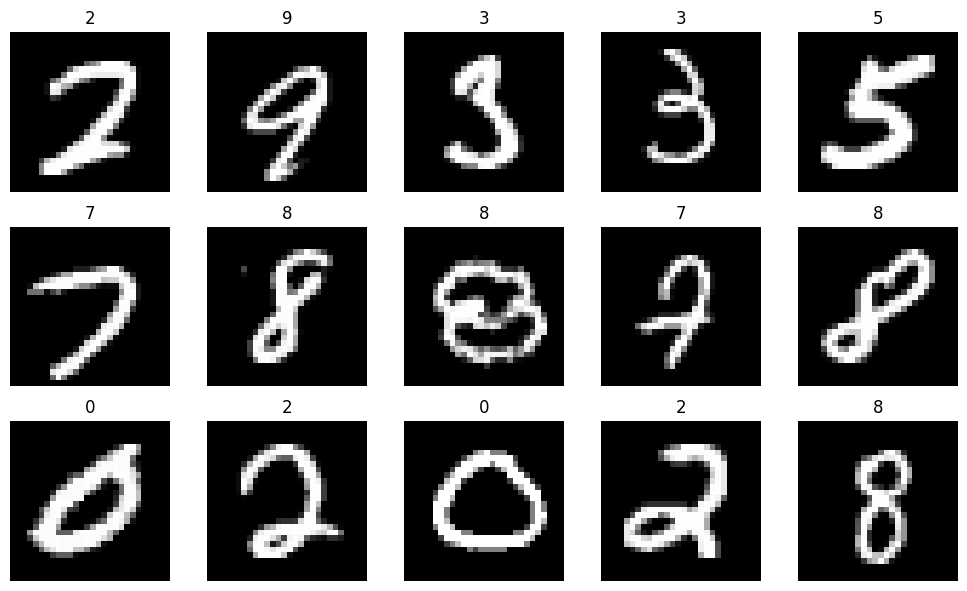

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Mostrar 15 ejemplos aleatorios
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = np.random.randint(0, len(X_train))
        img = X_train[ix]
        plt.subplot(r, c, _r*c + _c + 1)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(y_train[ix])
plt.tight_layout()
plt.show()


Normalice las imágenes del dataset y utilice la librería `scikitlearn` para crear un modelo que permita clasificar el dataset correctamente para indicar el valor representado en cada imagen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# Cargar el dataset MNIST
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")


# Normalizar las imágenes
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # ----- Clasificador SVC ----- #
# clf = LinearSVC(C=1.0, random_state=42)

# # Dividir el dataset en entrenamiento y prueba
# clf.fit(X_train, Y_train)

# # Evaluar el clasificador
# Y_pred = clf.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# ----- Clasificador de regresión logística ----- #

# # Dividir el dataset en entrenamiento y prueba
# clf = LogisticRegression(max_iter=6000)
# clf.fit(X_train, Y_train)

# # Evaluar el clasificador
# Y_pred = clf.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# ----- Clasificador KNN ----- #

# Entrenar un clasificador KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)

# Evaluar el clasificador
Y_pred = KNN.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Mostrar ejemplos de imágenes mal clasificadas
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
ix = 0
for _r in range(r):
    for _c in range(c):
        while Y_test[ix] == Y_pred[ix]:
            ix += 1
        img = X_test[ix].reshape(28, 28)
        plt.subplot(r, c, _r*c + _c + 1)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(f"Pred: {Y_pred[ix]}\nTrue: {Y_test[ix]}")
        ix += 1
plt.tight_layout()
plt.show()

# Mostrar ejemplos de imágenes bien clasificadas
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
ix = 0
for _r in range(r):
    for _c in range(c):
        while Y_test[ix] != Y_pred[ix]:
            ix += 1
        img = X_test[ix].reshape(28, 28)
        plt.subplot(r, c, _r*c + _c + 1)
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(f"Pred: {Y_pred[ix]}\nTrue: {Y_test[ix]}")
        ix += 1
plt.tight_layout()
plt.show()

X_train: (60000, 28, 28), Y_train: (60000,)
X_test: (10000, 28, 28), Y_test: (10000,)


c:\Users\ribei\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Puede utilizar el siguiente código para generar una matriz de confusión que permita observar el desempeño del modelo:

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

y_pred = evaluate(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

# Ejercicio 3

Descargue el código de [este repositorio](https://github.com/Jugarov/DinoGame), que contiene una reproducción del juego del dinosaurio de Google Chrome.

**3.1.** Modifique las funciones del archivo `NeuralNetwork.py` para crear una red neuronal multicapa fully-connected con las entradas y salidas que precise necesarias de manera que permita que el dinosaurio pueda saltar los cactus y agacharse ante los pájaros.

&emsp;&emsp;3.1.1. En la función `initialize` describa los valores iniciales de la matriz de pesos y bias que vaya a utilizar.

&emsp;&emsp;3.1.2. En la función `think` tome como argumento de la función los parámetros que necesite como entrada de la red y procese los mismos para obtener un resultado a la salida de la red. **Recuerde modificar la línea que utiliza esta función en `main.py` (línea 151)**.

&emsp;&emsp;3.1.3. En la función `act` defina qué función de activación utilizará para tomar una decisión sobre la siguiente acción del dinosaurio. Devuelva una etiqueta indicando dicha acción.

**3.2** Modifique las funciones del archivo `Genetic.py` para que, al final de cada generación (cuando todos los dinosaurios colisionan) se actualicen los pesos y biases de las matrices de la red neuronal usando un algoritmo genético.

La población será el número de dinosaurios que estén funcionando a la vez. Como función de evaluación, use la propiedad `score` de cada uno de los individuos.

&emsp;&emsp;3.2.1. La función `updateNetwork` recibe un vector de elementos de la clase `Dinosaur`. Esta función debe encargarse de aplicar una función de selección a cada individuo, seleccionarlos, cruzar los valores de las matrices y aplicar un mecanismo de mutación para generar la nueva población. Una vez generada la nueva población, **sustituya la matriz de cada individuo del vector `poblacion` que se usa en la entrada por el elemento correspondiente de la población evolucionada**. Solo así se verá afectado el comportamiento de los dinosaurios en sucesivas iteraciones.

&emsp;&emsp;3.2.2. La función `select_fittest` recibe el mismo vector que la función `updateNetwork` y debe ser capaz de analizar la propiedad `score` de cada individuo para formar parejas. Se sugiere que esta función devuelva como resultado los índices de los elementos seleccionados.

&emsp;&emsp;3.2.3. La función `evolve` recibe como argumento los dos elementos de la clase `Dinosaur` que han sido seleccionados por la clase anterior y les aplica el mecanismo de cruce y mutación de su elección. Puede incorporar un mecanismo de elitismo si lo desea.

El objetivo del ejercicio es lograr que alguno de los dinosaurios alcance una puntuación de por lo menos 1000 puntos.

# Ejercicio 4

El juego usado en el ejercicio anterior permite capturar imágenes y guardarlas en el directorio correspondiente a la tecla que se estuviera pulsando al momento de la captura para usarlo como etiqueta de los datos. Cree una base de datos, sanitarícelos, normalícelos y utilícelos para crear un modelo de red neuronal usando la librería *Tensorflow*. En el archivo `BuildTensorflowModel.py` encontrará las herramientas necesarias para realizar este proceso.

Una vez creado el modelo, corra el juego en el modo de ejecución *automático con modelo* (modo 'a' desde el menú principal del juego) y verifique que el dinosaurio sea capaz de alcanzar nuevamente una puntuación de 1000 puntos.